In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(load_diabetes()["data"],columns=load_diabetes()["feature_names"])
df["target"] = load_diabetes()["target"]
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [4]:
df['sex'] = df['sex'].apply(lambda x: 1 if x>0 else 0)

np.round(df.isnull().mean() * 100,1)

age       0.0
sex       0.0
bmi       0.0
bp        0.0
s1        0.0
s2        0.0
s3        0.0
s4        0.0
s5        0.0
s6        0.0
target    0.0
dtype: float64

In [5]:
# df['sex'] = df['sex'].astype(np.int8)

In [6]:
df.dtypes

age       float64
sex         int64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [7]:
cat_cols = [col for col in df.columns if df[col].dtype == np.int64]
for col in cat_cols:
    display(df.groupby(col).size())

sex
0    235
1    207
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

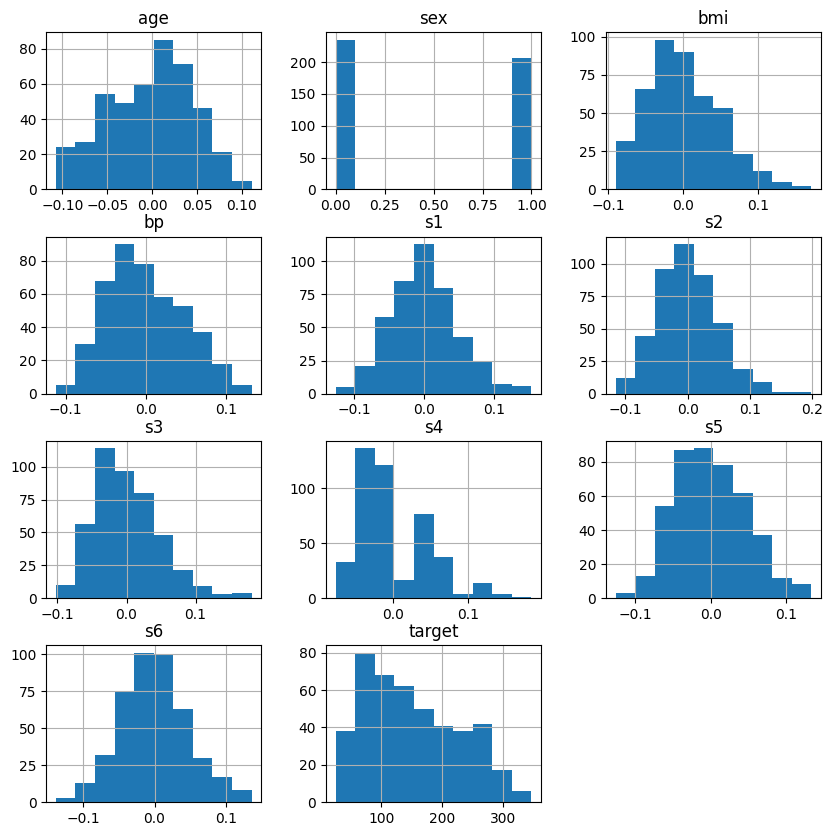

In [8]:
df.hist(figsize=(10,10))

In [9]:
from scipy.stats import normaltest

numeric_features = [col for col in df.columns if df[col].dtype == np.float64]
numeric_features.remove('target')

for i in numeric_features:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')

age: Not Gaussian  NormaltestResult(statistic=22.98072738269563, pvalue=1.0228182153991939e-05)
bmi: Not Gaussian  NormaltestResult(statistic=23.665619193944938, pvalue=7.262331793832974e-06)
bp: Not Gaussian  NormaltestResult(statistic=15.621391258402692, pvalue=0.00040537595836253937)
s1: Not Gaussian  NormaltestResult(statistic=11.20852755493566, pvalue=0.003682130413975528)
s2: Not Gaussian  NormaltestResult(statistic=18.031282903684225, pvalue=0.00012149451358987423)
s3: Not Gaussian  NormaltestResult(statistic=47.88065264242984, pvalue=4.0072679573118316e-11)
s4: Not Gaussian  NormaltestResult(statistic=36.314360987185864, pvalue=1.3014776207788022e-08)
s5: Not Gaussian  NormaltestResult(statistic=6.462738215551416, pvalue=0.039503377366703625)
s6: Gaussian  NormaltestResult(statistic=4.295701660173062, pvalue=0.11673477122976575)


In [10]:
import seaborn as sns

<Axes: >

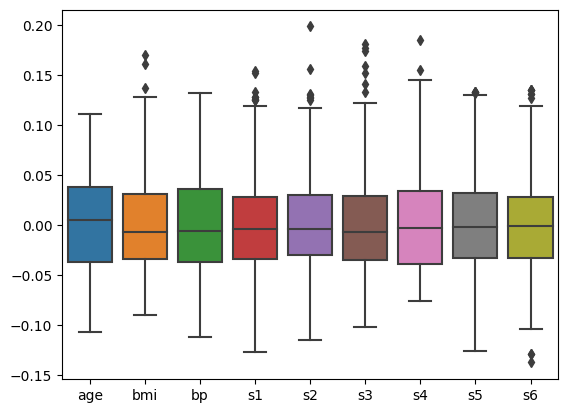

In [11]:
sns.boxplot(df[numeric_features])

<Axes: xlabel='sex', ylabel='target'>

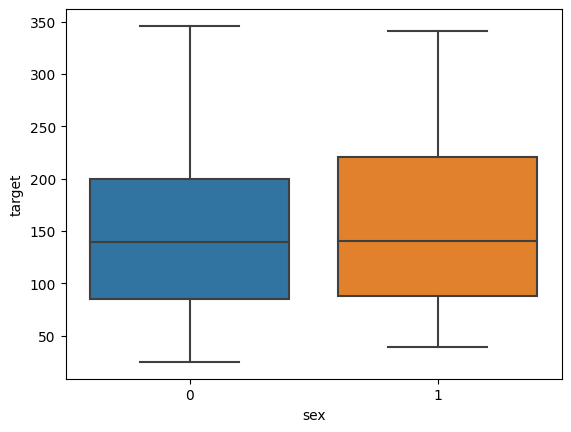

In [14]:
sns.boxplot(x=df['sex'],y=df['target'])

In [19]:
import matplotlib.pyplot as plt

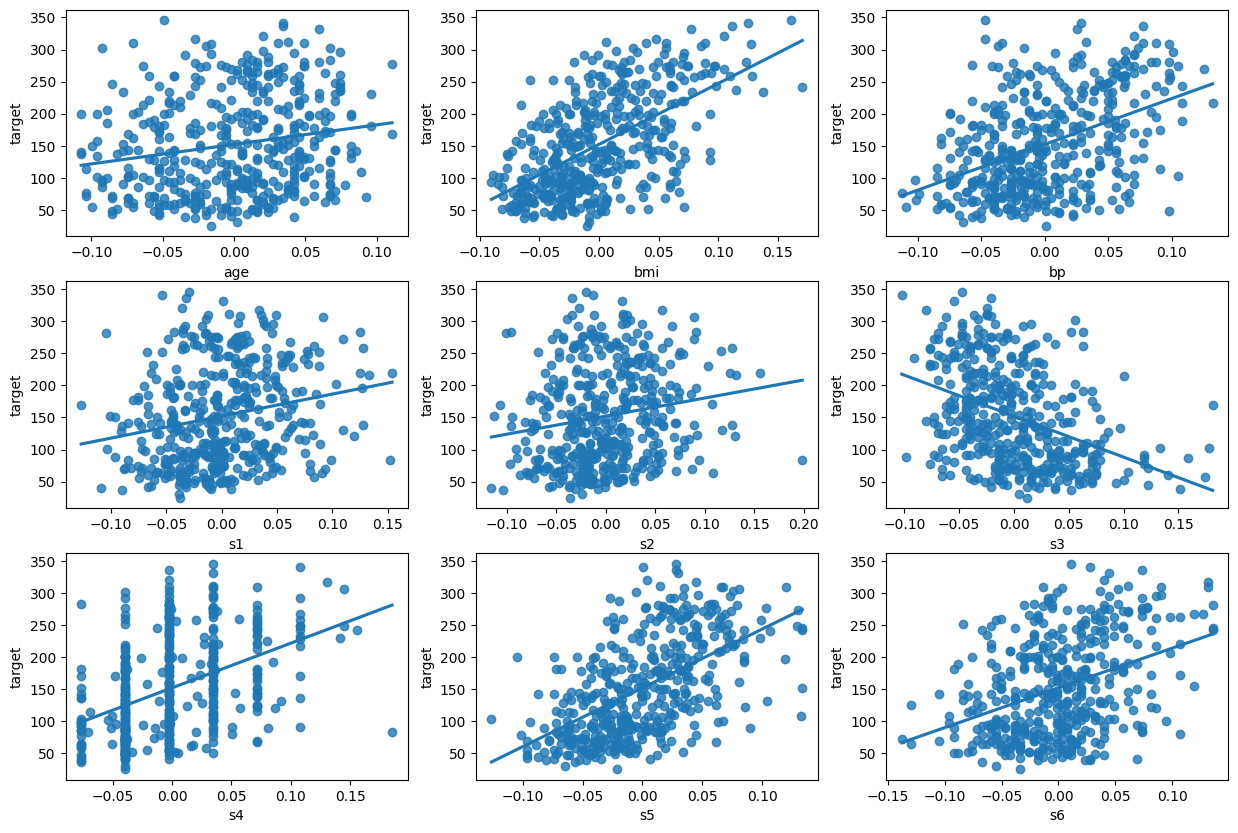

In [30]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) and (n > 0):
        row += 1
        col = 0
    sns.regplot(x=i,y="target",data=df,ax=ax[row,col],ci=False)
    col += 1

<Axes: >

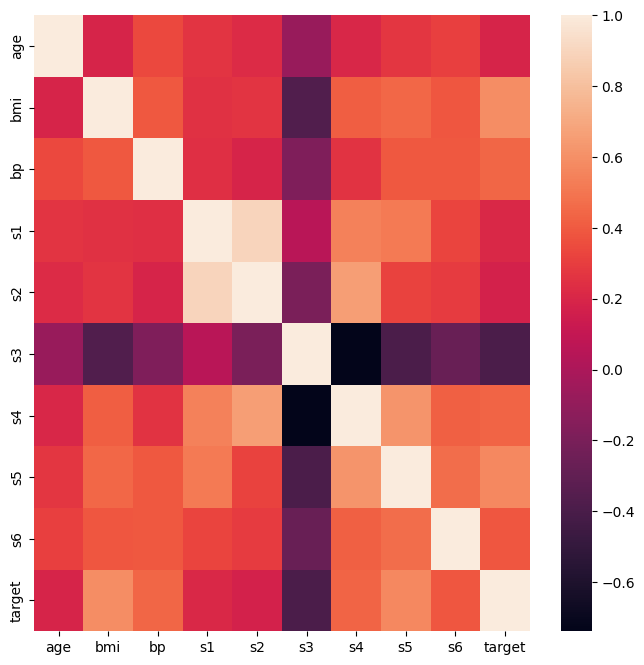

In [31]:
num_tgt = numeric_features.copy() 
num_tgt.append('target')
fig = plt.figure(figsize=(8,8))

sns.heatmap(df[num_tgt].corr(method='pearson'))

In [32]:
## check for variance inflation factor for multicollinearity